In [111]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [112]:
driver_data= pd.read_csv("/content/driver_data.csv")

In [113]:
driver_data.head()

,Distance_Feature,Speeding_Feature
0,71.24,28
1,52.53,25
2,64.54,27
3,55.69,22
4,54.58,25


In [114]:
#Standardization of data
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler().fit(driver_data)
df = std_scale.transform(driver_data)
df[:]

array([[-0.0898104 ,  1.26061251],
       [-0.43977285,  1.04174351],
       [-0.215131  ,  1.18765617],
       ...,
       [ 1.77447381,  0.09331115],
       [ 1.87229869, -0.41738319],
       [ 1.72060465, -0.12555785]])

In [115]:
# Importing K-Means
from sklearn.cluster import KMeans

In [116]:
ssq = []
for K in range(1,11):
    kmeans_model = KMeans(n_clusters=K, random_state=123)
    kmeans_model.fit(df)
    ssq.append(kmeans_model.inertia_)

In [117]:
pip install yellowbrick

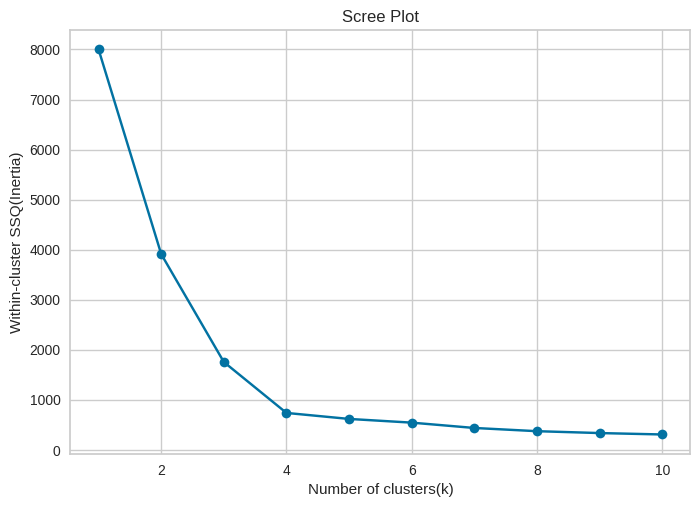

In [118]:
#plt.figure(figsize=(15,7))
plt.plot(range(1,11), ssq, marker='o')
plt.xlabel("Number of clusters(k)")
plt.ylabel("Within-cluster SSQ(Inertia)")
plt.title("Scree Plot")
plt.show()

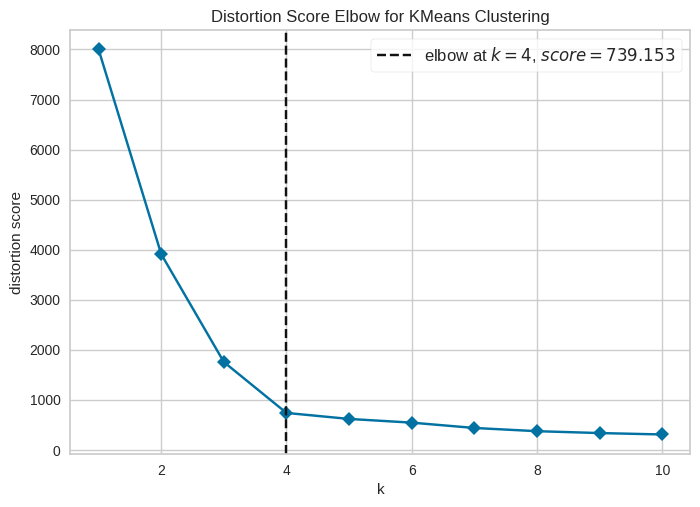

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [119]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer= KElbowVisualizer(kmeans_model,k=(1,11),timings=False)
visualizer.fit(df)
visualizer.show()

In [120]:
#K-Means Clustering
km = KMeans(n_clusters=4, random_state=123)
km.fit(df)

KMeans(n_clusters=4, random_state=123)

In [121]:
predicted_cluster = km.predict(df)
predicted_cluster[:15]

array([3, 3, 3, 3, 3, 0, 3, 0, 3, 3, 3, 3, 3, 3, 3], dtype=int32)

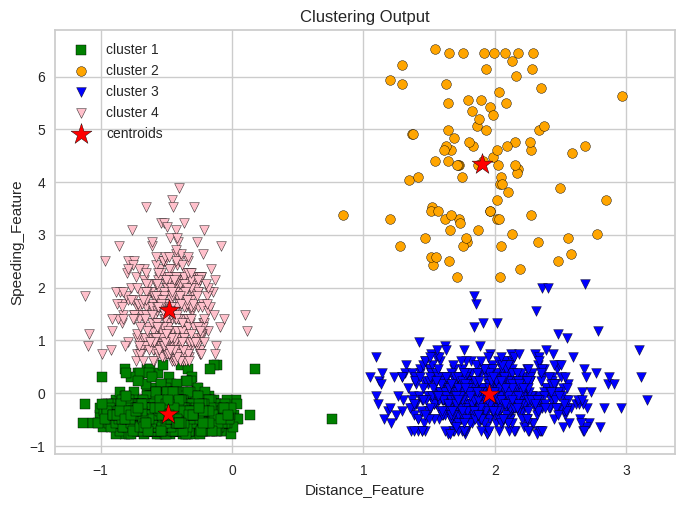

In [122]:
# Plotting of clusters
plt.scatter(df[predicted_cluster==0,0], df[predicted_cluster==0, 1],c='green',
           marker='s', edgecolors='black', label='cluster 1')
plt.scatter(df[predicted_cluster==1,0], df[predicted_cluster==1, 1],c='orange',
           marker='o', edgecolors='black', label='cluster 2')
plt.scatter(df[predicted_cluster==2,0], df[predicted_cluster==2, 1],c='blue',
           marker='v', edgecolors='black', label='cluster 3')
plt.scatter(df[predicted_cluster==3,0], df[predicted_cluster==3, 1],c='pink',
           marker='v', edgecolors='black', label='cluster 4')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s=250, c='red',
           marker='*', edgecolors='black', label='centroids')

plt.legend()
plt.xlabel("Distance_Feature")
plt.ylabel("Speeding_Feature")
plt.title("Clustering Output")
plt.show()